# Lesson-Data Aggregation
most data sets in real life require extensive cleaning and manipulation to extract any meaningful insights. In fact, Forbes estimates that data scientists spend about 60% of their time cleaning and organizing data, so it's critical to be able to manipulate data quickly and efficiently.

In this course, we'll learn the following:

Data aggregation
How to combine data
How to transform data
How to clean strings with pandas
How to handle missing and duplicate data
You'll need some basic knowledge of pandas and matplotlib to complete this course, including:

Basic knowledge of pandas dataframes and series
How to select values and filter a dataframe
Knowledge of data exploration methods in pandas, such as the info and head methods
How to create visualizations in pandas and matplotlib
All of these prerequisites are taught in Pandas and NumPy Fundamentals, Exploratory Data Visualization, and Storytelling Through Data Visualization courses. If you haven't completed those courses and aren't comfortable with the concepts above, we suggest completing them before continuing here.

In this course, we'll work with the World Happiness Report, an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.

It also includes estimates of factors that may contribute to each country's happiness, including economic production, social support, life expectancy, freedom, absence of corruption, and generosity, to provide context for the score. Although these factors aren't actually used in the calculation of the happiness score, they can help illustrate why a country received a certain score.

Throughout this course, we'll work to answer the following questions:

How can aggregating the data give us more insight into happiness scores?
How did world happiness change from 2015 to 2017?
Which factors contribute the most to the happiness score?
In this mission, we'll start by learning how to aggregate data. Then in the following missions, we'll learn different data cleaning skills that can help us aggregate and analyze the data in different ways. We'll start by learning each topic in isolation, but build towards a more complete data cleaning workflow by the end of the course.
We can find the data (here)[https://www.kaggle.com/unsdsn/world-happiness].

The data set is a CSV file called `World_Happiness_2015.csv.` Below are descriptions for some of the columns we'll be working with:

`Country` - Name of the country.
`Region` - Name of the region the country belongs to.
`Happiness Rank` - The rank of the country, as determined by its happiness score.
`Happiness Score` - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
`Family` - The estimated extent to which family contributes to the happiness score.
`Freedom` - The estimated extent to which freedom contributes to the happiness score.
`Generosity` - The estimated extent to which generosity contributes to the happiness score.

In [1]:
import pandas as pd
happiness2015=pd.read_csv('World_Happiness_2015.csv')
first_5=happiness2015[:5]
happiness2015.info()
print(first_5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [2]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

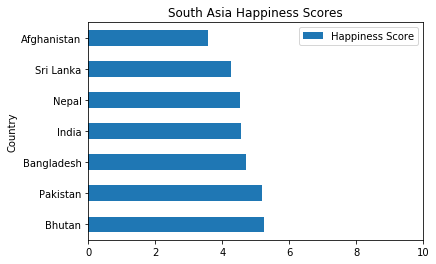

In [3]:
happiness2015[happiness2015["Region"]=="Southern Asia"].plot(x='Country',y='Happiness Score',kind='barh',title='South Asia Happiness Scores',xlim=(0,10))

### Using Loops to Aggregate Data

In [4]:
mean_happiness={}
regions=happiness2015["Region"].unique()
for r in regions:
    region_group=happiness2015[happiness2015["Region"]==r]
    mean_happiness_region=region_group["Happiness Score"].mean()
    mean_happiness[r]=mean_happiness_region
print(mean_happiness)    

{'Western Europe': 6.689619047619048, 'North America': 7.273, 'Australia and New Zealand': 7.285, 'Middle East and Northern Africa': 5.406899999999999, 'Latin America and Caribbean': 6.144681818181818, 'Southeastern Asia': 5.317444444444445, 'Central and Eastern Europe': 5.332931034482758, 'Eastern Asia': 5.626166666666666, 'Sub-Saharan Africa': 4.202800000000001, 'Southern Asia': 4.580857142857143}


### The GroupBy Operation - Creating GroupBy Objects
As with many other common tasks, pandas has a built-in operation for this process. The groupby operation performs the "split-apply-combine" process on a dataframe, but condenses it into two steps:

Create a GroupBy object.
Call a function on the GroupBy object.
The GroupBy object, distinct from a dataframe or series object, allows us to split the dataframe into groups, but only in an abstract sense. Nothing is actually computed until a function is called on the GroupBy object.
As with many other common tasks, pandas has a built-in operation for this process. The groupby operation performs the "split-apply-combine" process on a dataframe, but condenses it into two steps:

Create a GroupBy object.
Call a function on the GroupBy object.
The GroupBy object, distinct from a dataframe or series object, allows us to split the dataframe into groups, but only in an abstract sense. Nothing is actually computed until a function is called on the GroupBy object.

In [5]:
grouped=happiness2015.groupby('Region')
aus_nz=grouped.get_group('Australia and New Zealand')
print(aus_nz)

       Country                     Region  Happiness Rank  Happiness Score  \
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard Error  Economy (GDP per Capita)   Family  \
8         0.03371                   1.25018  1.31967   
9         0.04083                   1.33358  1.30923   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
8                   0.90837  0.63938                        0.42922   
9                   0.93156  0.65124                        0.35637   

   Generosity  Dystopia Residual  
8     0.47501            2.26425  
9     0.43562            2.26646  


### Exploring GroupBy Objects

In [6]:
grouped = happiness2015.groupby('Region')
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [7]:
happiness2015.iloc[range(8,10)]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [8]:
grouped = happiness2015.groupby('Region')
grouped.groups
north_america=happiness2015.iloc[[4,14]]
north_america_countries=happiness2015.iloc[[4,14],[0]]
na_group=grouped.get_group("North America")
equal=north_america==na_group
print(equal)

    Country  Region  Happiness Rank  Happiness Score  Standard Error  \
4      True    True            True             True            True   
14     True    True            True             True            True   

    Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
4                       True    True                      True     True   
14                      True    True                      True     True   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
4                            True        True               True  
14                           True        True               True  


### Aggregation Methods
Methods	Description
mean()	Calculates the mean of groups.
sum()	Calculates the sum of group values.
size()	Calculates the size of the groups.
count()	Calculates the count of values in groups.
min()	Calculates the minimum of group values.
max()	Calculates the maximum of group values.

In [9]:
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [10]:
grouped.mean().sort_values(by='Happiness Rank',ascending=True)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Western Europe,29.523810,6.689619,0.037625,1.298596,1.247302,0.909148,0.549926,0.231463,0.302109,2.151185
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769


### Aggregating with Specific Columns with GroupBy

In [11]:
print(grouped["Happiness Score"].mean())

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


### Introduction to Agg() Method
 The `GroupBy.agg()` method can perform >1 aggregations at once. We can use the following syntax:
 `GroupBy.agg(function1,function2,function3)`
 Note that when we pass the functions into the agg() method as arguments, we don't use parentheses after the function names.

In [12]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
mean_max=[np.mean,np.max]
happy_mean_max=happy_grouped.agg(mean_max)
def dif(group):
    return (group.max() - group.mean())
mean_max_dif=happy_grouped.agg(dif)
print(happy_mean_max) 
print(mean_max_dif) 

                                     mean   amax
Region                                          
Australia and New Zealand        7.285000  7.286
Central and Eastern Europe       5.332931  6.505
Eastern Asia                     5.626167  6.298
Latin America and Caribbean      6.144682  7.226
Middle East and Northern Africa  5.406900  7.278
North America                    7.273000  7.427
Southeastern Asia                5.317444  6.798
Southern Asia                    4.580857  5.253
Sub-Saharan Africa               4.202800  5.477
Western Europe                   6.689619  7.587
Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western E

In [13]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
print(happiness_means)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


### DataFrame Pivot Tables
`Index` and `value`s are actually arguments used in another method used to aggregate data - the `DataFrame.pivot_table()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html). This `df.pivot_table()` method can perform the same kinds of aggregations as the `df.groupb`y method and make the code for complex aggregations easier to read.
`happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)`
This method returns a dataframe, so normal dataframe filtering and methods can be applied to the result. For example, let's use the `DataFrame.plot()` method to create a visualization. Note that we exclude aggfunc below because the mean is the default aggregation function of `df.pivot_table()`

`pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)`

5.3757341772151905


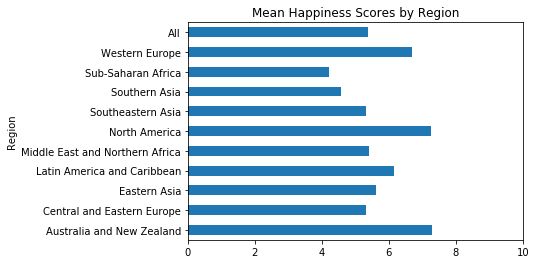

In [14]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh',title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)
print(happiness2015["Happiness Score"].mean())

when we set the `margin` parameter equal to `True`,`All` will be added to the index of the resulting dataframe and the corresponding value will be the result of applying the aggregation method to the entire column. In our example, `All` is the `mean` of the `Happiness Score column`.

The pivot_table method also allows us to aggregate multiple columns and apply multiple functions at once.

Below, we aggregate both the `'Happiness Score'` and `'Family'` columns in happiness2015 and group by the `'Region'` column:
`happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')`

In [15]:
grouped=happiness2015.groupby("Region")[["Happiness Score","Family"]]
happy_family_stats=grouped.agg([np.min,np.max,np.mean])
pv_happy_family_stats=happiness2015.pivot_table(values=['Happiness Score','Family'],index='Region',aggfunc=[np.min,np.max,np.mean],margins=True)
print(happy_family_stats)
print(pv_happy_family_stats)

                                Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   